In [2]:
# %load registration_utilities.py
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import SimpleITK as sitk

# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt
import numpy as np

import SimpleITK as sitk
import registration_utilities as ru
import math,euler
from transform_tools import *

In [3]:
#create fixed and moving datapoints

sigma=0.1

N=3
shift=(N-1)/2.

Dict2d={}
_range=range(N)
fixed=[]
i=0
for x in _range:
    for y in _range:
        for z in _range:
            fixed.append([float(x-shift),float(y-shift),float(z-shift)])
            Dict2d[(x,y,z)]=i
            i+=1
nbrs=create_neighborhood(Dict2d,N)
fixed=np.array(fixed)
moving=np.array(fixed)
moving+=np.random.normal(0,sigma,size=moving.shape) #add gaussian noise.


In [4]:
## rigid
moving=np.array(fixed*euler.Rx(math.pi/10)*euler.Ry(-math.pi/8))

In [5]:
# rigid+ scaling
moving=np.array(fixed*euler.Rx(math.pi/10)*1.1)

In [6]:
# Rigid + squeezing the belt
moving=np.array(fixed*euler.Rx(math.pi/10))
belt= moving[:,0]==0
moving[belt]=moving[belt]*0.8

In [7]:
moved,transform,inv_transform=find_and_eval_transform(sitk.VersorRigid3DTransform(),fixed,moving)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
moved,transform,inv_transform=find_and_eval_transform(sitk.AffineTransform(3),fixed,moving)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

N = 256
grid_spacing = 64

grid = sitk.GridSource(
    outputPixelType=sitk.sitkFloat32,
    size=(N, N),
    sigma=(0.5, 0.5),
    gridSpacing=(grid_spacing, grid_spacing),
    gridOffset=(0, 0),
    spacing=(1, 1),
)

array = sitk.GetArrayViewFromImage(grid)
fig, ax = plt.subplots(dpi=150)
ax.imshow(
    array,
    interpolation='hamming',
);

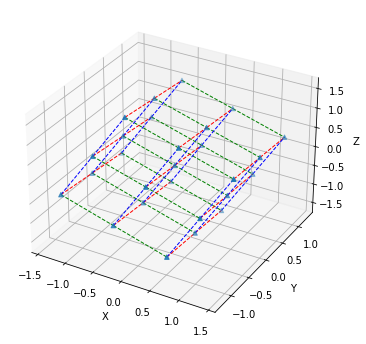

In [23]:
fig = plt.figure(figsize=plt.figaspect(1)*1.5)
ax = fig.add_subplot(projection='3d')

dplt(ax,moving,N,nbrs,m='^',linewidth=1,linestyle='dashed')
dplt(ax,fixed,N,nbrs,m='o',linewidth=1)

In [16]:
back=transformPoints(inv_transform,moving)

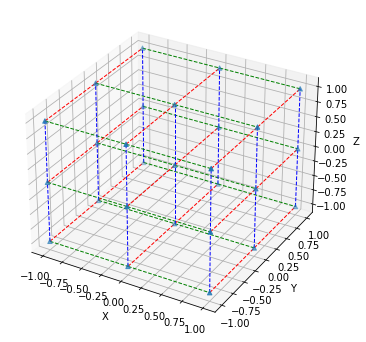

In [21]:
fig = plt.figure(figsize=plt.figaspect(1)*1.5)
ax = fig.add_subplot(projection='3d')

dplt(ax,back,N,nbrs,m='^',linewidth=1,linestyle='dashed')
dplt(ax,fixed,N,nbrs,m='o',linewidth=1)